### Why we need to use HTTP request?

The Hypertext Transfer Protocol (HTTP) is designed to enable communications between clients and servers. The HTTP request abstracts the complexities of making requests behind a beautiful, simple API so that you can focus on interacting with services and consuming data in your application.

 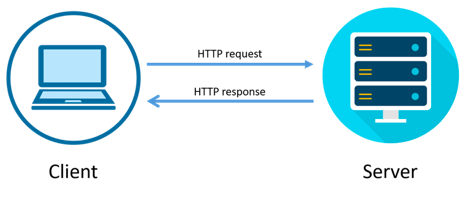


The most common HTTP method for information extraction is GET. The response of a GET request often has some valuable information in the message body.

    response = requests.get(url)

The first bit of information that you can gather from Response is the status code. A status code informs you of the status of the request.

    response.status_code
    200
    
As a result, a 200 status means that your request was successful, whereas a 404 status means that the resource you were looking for was not found.


if the request goes successful, you can now examine the content by running the following code:
    
    response.content

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import date
import csv
import os
import json
import urllib.request
import pandas as pd
from datetime import date

Check your browser headers here: http://myhttpheader.com/

In [2]:
# pass headers in a dict to the headers parameter to mimic a real human doing the request using a web browser
headers = {
    'accept': '*/*',
    'content-type': 'text/html;charset=UTF-8',
    'content-encoding': 'gzip',
    'origin': 'www.zillow.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
}

**Try for one listing page**

In [3]:
url = "https://www.zillow.com/new-york-ny/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22New%20York%2C%20NY%22%2C%22mapBounds%22%3A%7B%22west%22%3A-74.40402792382811%2C%22east%22%3A-73.55533407617186%2C%22south%22%3A40.41614210676251%2C%22north%22%3A40.9783747514048%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A6181%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%7D"
r = requests.get(url, headers=headers)
print(r.status_code)

200


In [4]:
# read the response content with soup
soup = BeautifulSoup(r.content, 'html.parser')

print(soup.prettify())

<html>
 <head>
  <meta content="noindex, nofollow" name="robots"/>
  <link href="https://www.zillowstatic.com/vstatic/80d5e73/static/css/z-pages/captcha.css" media="screen" rel="stylesheet" type="text/css"/>
  <script>
   window._pxAppId = 'PXHYx10rg3';
        window._pxJsClientSrc = '/HYx10rg3/init.js';
        window._pxHostUrl = '/HYx10rg3/xhr';
        window._pxFirstPartyEnabled = true;
        window._pxreCaptchaTheme='light';
  </script>
  <script src="https://captcha.px-cdn.net/PXHYx10rg3/captcha.js?a=c&amp;m=0" type="text/javascript">
  </script>
  <script>
   function getQueryString(name, url) {
            if (!url) url = window.location.href;
            name = name.replace(/[\[\]]/g, "\\$&");
            var regex = new RegExp("[?&]" + name + "(=([^&#]*)|&|#|$)"),
                results = regex.exec(url);
            if (!results) return null;
            if (!results[2]) return '';
            return decodeURIComponent(results[2].replace(/\+/g, " "));
        }
        

**navigate on the page, try to get the price and address for individual listings**

In [8]:
price_tags = soup.find_all("span", attrs={"data-test": "property-card-price"})
print(price_tags)

[]


In [9]:
price_tags[0].get_text()

IndexError: list index out of range

In [10]:
address_tags = soup.find_all("address", attrs={"data-test": "property-card-addr"})
print(address_tags)

[]


In [11]:
address_tags[0].get_text()

IndexError: list index out of range

**navigate on the page, try to get the links for individual listings**

In [21]:
a_tags = soup.find_all("a", attrs={"data-test": "property-card-link"})

In [22]:
a_tags[0]

IndexError: list index out of range

In [14]:
page_link = a_tags[0].get("href")
page_link

IndexError: list index out of range

In [15]:
page_response = requests.get(page_link, headers=headers)
page_soup = BeautifulSoup(page_response.content, 'html.parser')
print(page_soup.prettify())

NameError: name 'page_link' is not defined

**handle when page link is incomplete**

In [16]:
page_link = a_tags[10].get("href")
page_link

IndexError: list index out of range

In [17]:
if "zillow" not in page_link:
    page_link = "https://www.zillow.com/" + page_link
    
page_response = requests.get(page_link, headers=headers)
page_soup = BeautifulSoup(page_response.content, 'html.parser')
print(page_soup.prettify())

NameError: name 'page_link' is not defined

**try to get information from the individual page** 

In [18]:
# description 
page_soup.find('div', class_="hdp__sc-1j01zad-1 hmkpQE").get_text()

NameError: name 'page_soup' is not defined

In [19]:
# number of beds and baths
page_soup.find("span",{'data-testid':'bed-bath-beyond'}).text

NameError: name 'page_soup' is not defined

In [20]:
# highlights
[tag.text for tag in page_soup.find_all("li",{'class':'dpf__sc-2arhs5-0 ecJCxh'})]

NameError: name 'page_soup' is not defined

**finding information in script tag** 

In [ ]:
script_str = str(page_soup.find('script', {"type":"application/json","id":"hdpApolloPreloadedData"}))
print(script_str)

In [ ]:
def parse_script(script_str):
    script_str = script_str.replace("\\","")
    script_str = script_str.replace('<script id="hdpApolloPreloadedData" type="application/json">','') 
    script_str = script_str.replace('</script>','') 
    
    splited = script_str.split(',')
    
    script_dict = {}
    for item in splited: 
        item = item.replace("\"","")
        
        key = item.split(":")[0]
        value = "".join(item.split(":")[1:])
        
        script_dict[key] = value 
        
    return script_dict


In [ ]:
script_dict = parse_script(script_str)
script_dict

In [ ]:
script_dict["zestimate"]

In [ ]:
script_dict["daysOnZillow"]

In [ ]:
script_dict["yearBuilt"]

In [ ]:
script_dict["streetAddress"]

In [ ]:
script_dict["city"]

In [ ]:
script_dict["state"]

In [ ]:
script_dict["zipcode"]

In [ ]:
script_dict["homeType"]

### Put it all together! 

In [ ]:
# specify how many listings you want to crawl  
num_listings = 20

In [ ]:
# initiate lists here
address = []
num_rooms = []
price = []
h_link = []

description = []
highlight = []

zestimate = []
days_on_zillow = []
year_built = []
street_address = []
city = []
state = []
zipcode = []
home_type = []

timestamp = []

# record when the data is crawled
date_today = date.today()

# number of listing crawled
crawled_listing = 0

page_count = 1

In [ ]:
# Making soup 
url = "https://www.zillow.com/new-york-ny/?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A2%7D%2C%22usersSearchTerm%22%3A%22New%20York%2C%20NY%22%2C%22mapBounds%22%3A%7B%22west%22%3A-74.4088344423828%2C%22east%22%3A-73.55052755761717%2C%22south%22%3A40.41614210676251%2C%22north%22%3A40.9783747514048%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A6181%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%7D"
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.content, 'html.parser')

# Parsing soup  
while num_listings > crawled_listing:
    
    # Meta Page 
    articles = soup.find_all("article", attrs={"data-test": "property-card"})
    
    for article in articles:
        # address
        try:
            address.append(article.find("address", attrs={"data-test": "property-card-addr"}).text)
        except Exception:
            address.append('N/A')
            
        # price
        try:
            price.append(article.find("span", attrs={"data-test": "property-card-price"}).text)
        except Exception:
            price.append('N/A')
        
        # h_link
        try:
            page_link = article.find("a", attrs={"data-test": "property-card-link"}).get("href")
            if "zillow" not in page_link:
                page_link = "https://www.zillow.com/" + page_link
            h_link.append(page_link)
        except Exception:
            h_link.append('N/A')
        
        # Go inside each page 
        if h_link[-1] != 'N/A':
            try:
                page_response = requests.get(page_link, headers=headers)
            except Exception:
                description.append("N/A") 
                highlight.append("N/A") 
                zestimate.append("N/A") 
                days_on_zillow.append("N/A") 
                year_built.append("N/A") 
                street_address.append("N/A") 
                city.append("N/A") 
                state.append("N/A") 
                zipcode.append("N/A") 
                home_type.append("N/A")
                
                continue
        
            page_soup = BeautifulSoup(page_response.content, 'html.parser')
            
            # description 
            try:
                description.append(page_soup.find('div',class_="hdp__sc-1j01zad-1 hmkpQE").get_text())
            except Exception:
                description.append('N/A')

            # highlight
            try:
                highlight_text = ";".join([tag.text for tag in page_soup.find_all("li",{'class':'dpf__sc-2arhs5-0 ecJCxh'})])
                highlight.append(highlight_text)
            except Exception:
                highlight.append('N/A')
                
            #num_rooms
            try:
                num_rooms.append(page_soup.find("span",{'data-testid':'bed-bath-beyond'}).text)
            except Exception:
                num_rooms.append('N/A')
                
            # Get script data    
            script_str = str(page_soup.find('script', {"type":"application/json","id":"hdpApolloPreloadedData"}))
            script_dict = parse_script(script_str)
                
            # zestimate 
            try:
                zestimate.append(script_dict["zestimate"])
            except Exception:
                zestimate.append('N/A')
                
            # days_on_zillow 
            try:
                days_on_zillow.append(script_dict["daysOnZillow"])
            except Exception:
                days_on_zillow.append('N/A')
            
            # year_built 
            try:
                year_built.append(script_dict["yearBuilt"])
            except Exception:
                year_built.append('N/A')
                
            # street_address
            try:
                street_address.append(script_dict["streetAddress"])
            except Exception:
                street_address.append('N/A')
            
            # city 
            try:
                city.append(script_dict["city"])
            except Exception:
                city.append('N/A')
                
            # state 
            try:
                state.append(script_dict["state"])
            except Exception:
                state.append('N/A')
                
            # zipcode 
            try:
                zipcode.append(script_dict["zipcode"])
            except Exception:
                zipcode.append('N/A')
            
            # home_type 
            try:
                home_type.append(script_dict["homeType"])
            except Exception:
                home_type.append('N/A')
        
        else:
            description.append("N/A") 
            highlight.append("N/A") 
            zestimate.append("N/A") 
            days_on_zillow.append("N/A") 
            year_built.append("N/A") 
            street_address.append("N/A") 
            city.append("N/A") 
            state.append("N/A") 
            zipcode.append("N/A") 
            home_type.append("N/A")
        
        # timestamp
        timestamp.append(date_today)
                                 
        # increment cralwed_listing                        
        crawled_listing += 1

        # if reached number of listings, break out of loop
        if num_listings == crawled_listing:
            break
    
    
    # End of for loop of one page  # 
                                 
    # updating request link 
    page_count += 1
    
    url = "https://www.zillow.com/new-york-ny/{}_p/?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A2%7D%2C%22usersSearchTerm%22%3A%22New%20York%2C%20NY%22%2C%22mapBounds%22%3A%7B%22west%22%3A-74.40402792382811%2C%22east%22%3A-73.55533407617186%2C%22south%22%3A40.41614210676251%2C%22north%22%3A40.9783747514048%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A6181%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%7D".format(page_count)  
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.content, 'html.parser')

In [ ]:
# create a dataframe based on the lists created above
df = pd.DataFrame(list(zip(address, price, h_link, timestamp,
                           description, highlight, num_rooms,
                           zestimate, days_on_zillow, year_built,street_address, 
                           city, state, zipcode, home_type)),
                  columns = ["address",  "price", "h_link", "timestamp",
                           "description", "highlight", "num_rooms",
                           "zestimate", "days_on_zillow", "year_built","street_address", 
                           "city", "state", "zipcode", "home_type"])

In [ ]:
df

In [ ]:
df.to_csv("zillow_listings.csv")